<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/3_1_ML_Clustering_K_means_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [ ]:
modelKM = KMeans(n_clusters= 3, random_state=2)
modelKM.fit(X)

KMeans(n_clusters=3, random_state=2)

In [ ]:
modelKM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
centers = modelKM.cluster_centers_

In [ ]:
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
centers[0,0]

5.901612903225806

In [ ]:
centers[0,3]

1.4338709677419355

Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.
Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).
Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

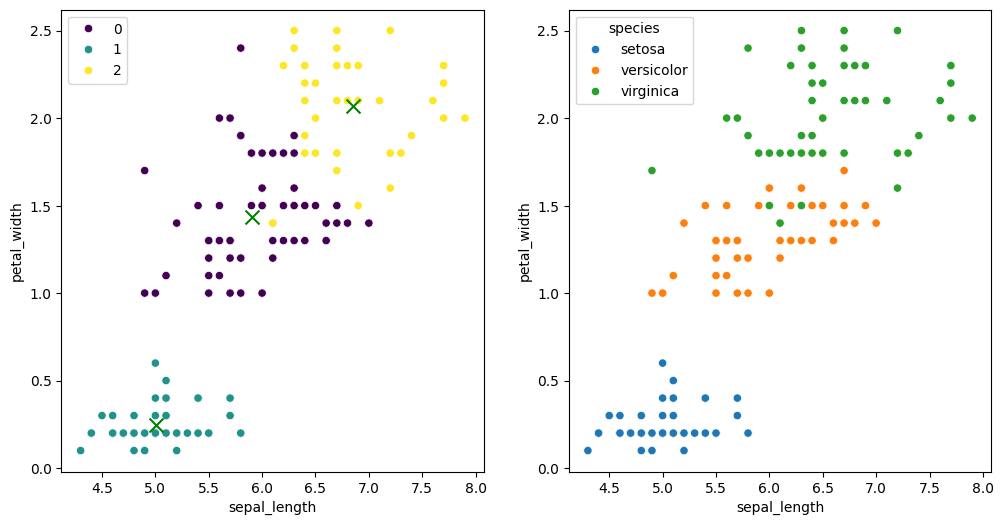

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data= df ,x='sepal_length', y='petal_width',hue=modelKM.labels_, palette='viridis' )
for i in range(0,3):
  plt.scatter(centers[i,0], centers[i,3], marker='x', c = 'green', s=100)

plt.subplot(1,2,2)
sns.scatterplot(data = df, x='sepal_length', y='petal_width' , hue='species')
plt.show()

In [ ]:
def plot_Kmeans_cluster(n_clust, X, df):
    modelKM = KMeans(n_clusters= n_clust, random_state=2)
    modelKM.fit(X)
    centers = modelKM.cluster_centers_
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.scatterplot(data= df ,x='sepal_length', y='petal_width',hue=modelKM.labels_, palette='viridis' )
    for i in range(n_clust):
      plt.scatter(centers[i,0], centers[i,3], marker='x', c = 'green', s=100)
    plt.subplot(1,2,2)
    sns.scatterplot(data = df, x='sepal_length', y='petal_width' , hue='species')
    plt.show()

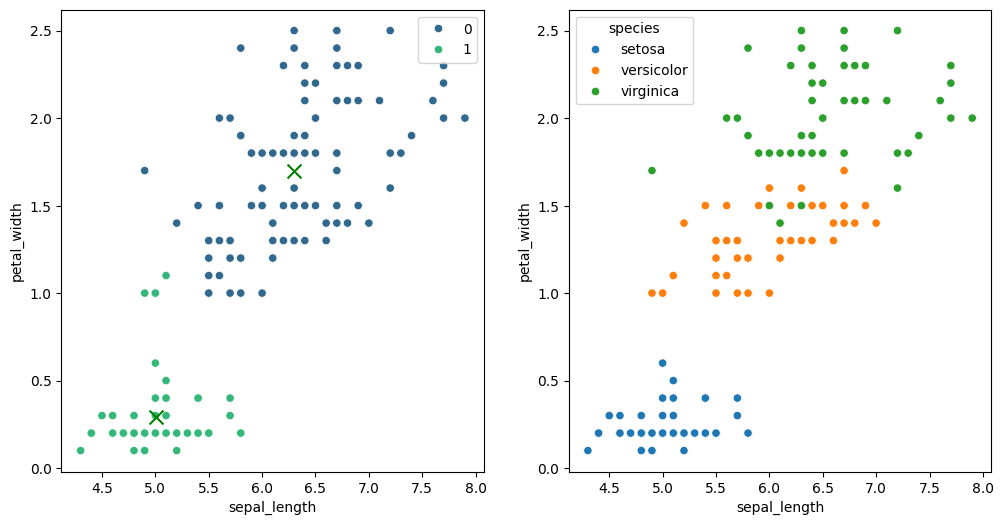

In [ ]:
plot_Kmeans_cluster(2,X,df)

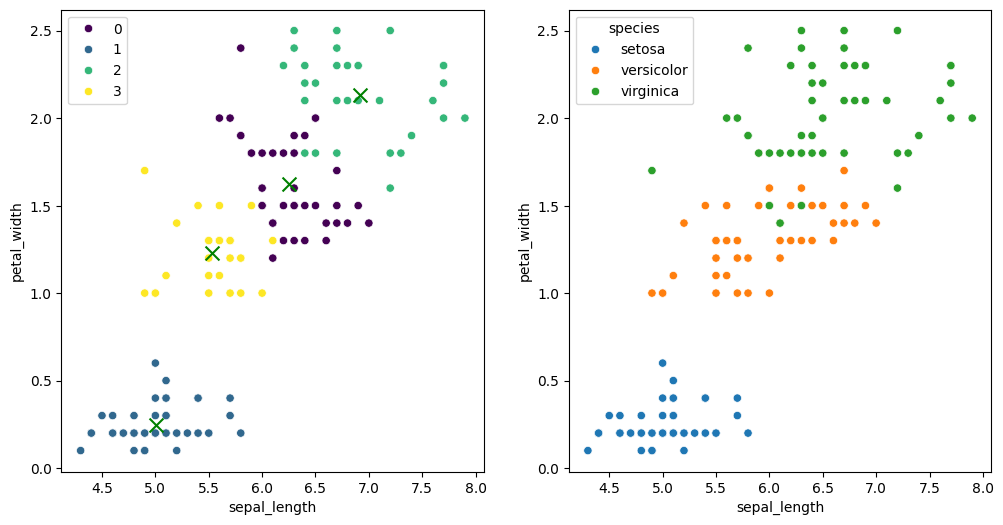

In [ ]:
plot_Kmeans_cluster(4,X,df)

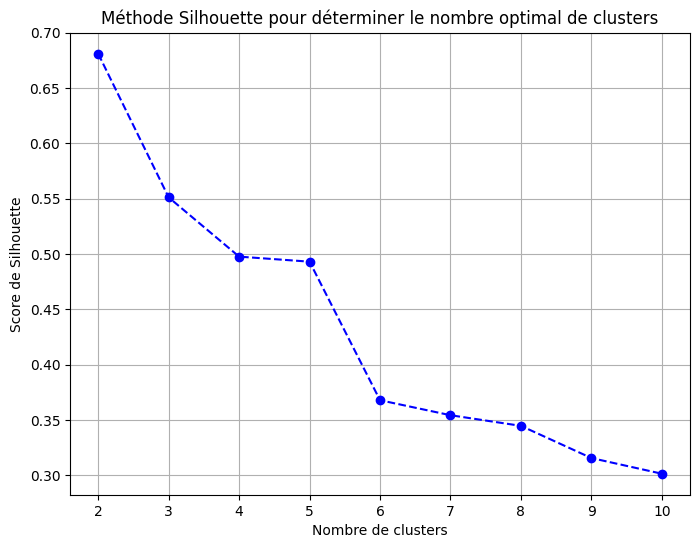

In [ ]:
from sklearn.metrics  import silhouette_score
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(score)

# Tracer la courbe Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='b', linestyle='--')
plt.title('Méthode Silhouette pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [ ]:
inertias = []

# Tester différents nombres de clusters de 2 à 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

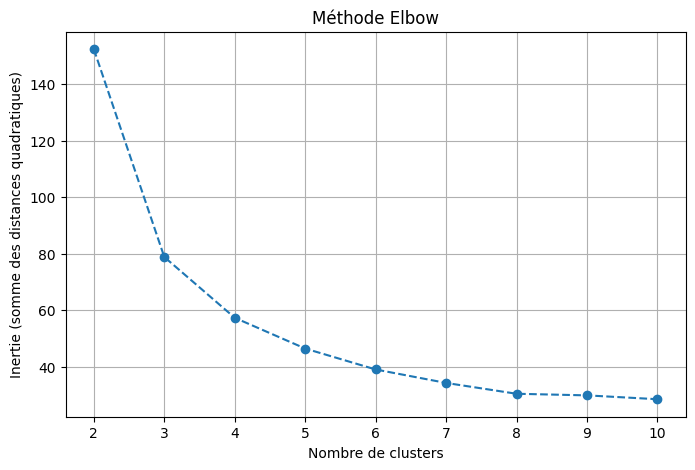

In [ ]:
# Tracer la courbe Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o', linestyle='--')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (somme des distances quadratiques)')
plt.xticks(range(2, 11))
plt.grid()
plt.show()